# 1. What is Context-aware Recommendation
## 1.1 문제 정의
**Review - 추천 시스템에서 사용하는 정보**
1. 유저 관련 정보
2. 아이템 관련 정보
3. 유저 - 아이템 상호작용 정보
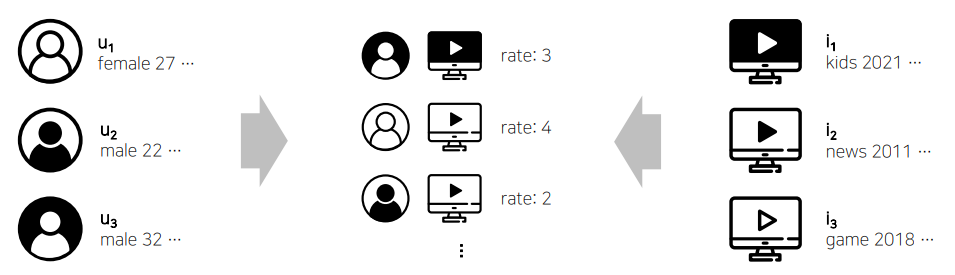

**행렬 분해(MF) 기법을 활용한 협업 필터링(CF)의 한계**

개별 유저와 개별 아이템 간 상호 작용을 2차원 행렬로 표현한다.
- 유저의 데모그래픽이나 아이템의 카테고리 및 태그 등 여러 특성(feature)들을 추천 시스템에 반영할 수 없다.
- 상호작용 정보가 아직 부족할 경우, 즉 'cold start'에 대한 대처가 어렵다.
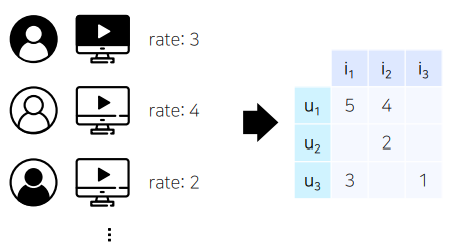

**컨텍스트 기반 추천 시스템(Context-aware Recommender System)**

: 유저와 아이템 간 상호작용 정보 뿐만 아니라, 맥락(context)적 정보도 함께 반영하는 추천 시스템이다.
- X를 통해 Y의 값을 추론하는 일반적인 예측 문제에 두루 사용 가능하다 -> General Predictor
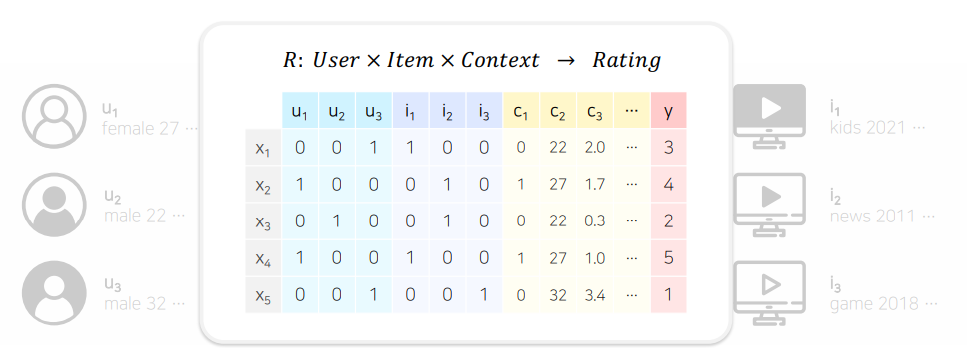

## 1.2 활용 예시
**Click-Through Rate Prediction**

CTR 예측 : 유저가 주어진 아이템을 클릭할 확률(probability)을 예측하는 문제이다.
- 예측해야 하는 y값은 클릭 여부, 즉 0 또는 1이므로 이진 분류(binary classification) 문제에 해당한다.
- 모델에서 출력한 실수 값을 시그모이드(sigmoid) 함수에 통과시킨면 (0, 1) 사이의 예측 CTR 값이 된다.
<br></br>

CTR 예측은 광고에서 주요 사용된다.
- 광고 추천을 잘 하면 곧 돈이 된다. 그래서 매우 중요하다.
- 광고가 노출된 상황의 다양한 유저, 광고, 컨텍스트 피쳐를 모델의 입력 변수로 사용한다.
- 유저 ID가 존재하지 않는 데이터도 다른 유저 피쳐나 컨텍스트 피쳐를 사용하여 예측할 수 있다.
    - 실제로 현업에서는 유저 ID를 피쳐로 사용하지 않는 경우가 많다.

**이진 분류 문제 - 로지스틱 회귀(Logistic Regression)**

- 기본 모형
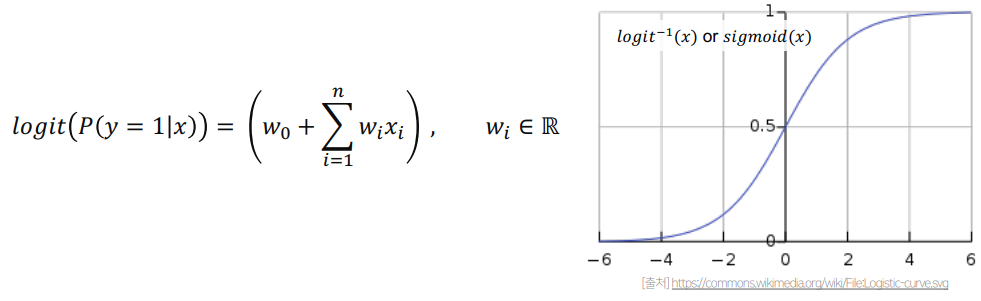
<br></br>

- Polynomial Model
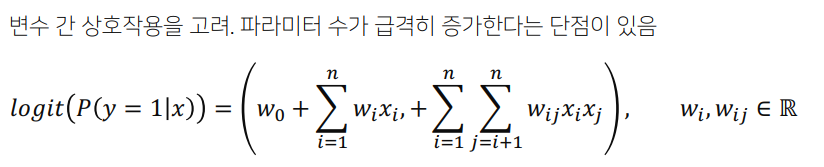

## 1.3 사용 데이터
**Dense Feature vs. Sparse Feature**

dense feature : 벡터로 표현했을 시 비교적 작은 공간에 밀집되어 분포하는 수치형 변수이다.
- ex) 유저-아이템 평점, 기온, 시간 등
<br></br>

sparse feature : 벡터로 표현했을 시 비교적 넓은 공간에 분포하는 범주형 변수이다.
- ex) 유저/아이템 ID, 요일, 분류, 키워드, 태그 등
- 수요일 - [0,0,1,0,0,0,0], 토요일 - [0,0,0,0,0,1,0]

CTR 예측 문제에 사용되는 데이터를 구성하는 요소는 대부분 sparse feature이다.

**피쳐 임베딩(Feature Embedding)**

One-hot Encoding의 한계
- 파라미터 수가 너무 많아질 수 있다.
- 학습 데이터에 등장하는 빈도에 따라 특정 카테고리가 과적합/과소적합 될 수 있다.
<br></br>

따라서 피쳐 임베딩을 한 이후에 이 피쳐를 가지고 예측을 하기도 한다.
- Item2Vec : 아이템을 벡터로 나타내는 것(from Word2Vec)
- 자연어 처리에 사용되는 텍스트 임베딩 기법들이 흔히 적용된다.
    - Latent Dirichlet Allocation(Topic Modeling)
    - BERT(Pretrained Language Model)

# 2. Factorization Machine(FM)
## 2.1 개요
**Factorization Machines**
- SVM과 FM의 장점을 결합한 FM을 처음 소개한 논문이다.

**Factorization Machine(FM)의 등장 배경**

딥러닝이 등장하기 이전에는 서포트 벡터 머신(SVM)이 가장 많이 사용되는 모델이었다.
- 커널 공간을 활용하여 비선형 데이터셋에 대해서 높은 성능을 보였다.
<br></br>

그럼에도 CF 환경에서는 SVM보다 MF 계열의 모델이 더 높은 성능을 내왔다.
- 매우 희소(sparse)한 데이터에 대해서는 SVM이 좋은 성능을 내지 못했다.
<br></br>

하지만 MF 모델은 특별한 환경 혹은 데이터에만 적용할 수 있다.
- X : (유저, 아이템) -> Y : (rating)으로 이루어진 데이터에 대해서만 적용이 가능하다.

**이 둘의 장점을 결합할 수 없을까?**

## 2.2 FM 공식
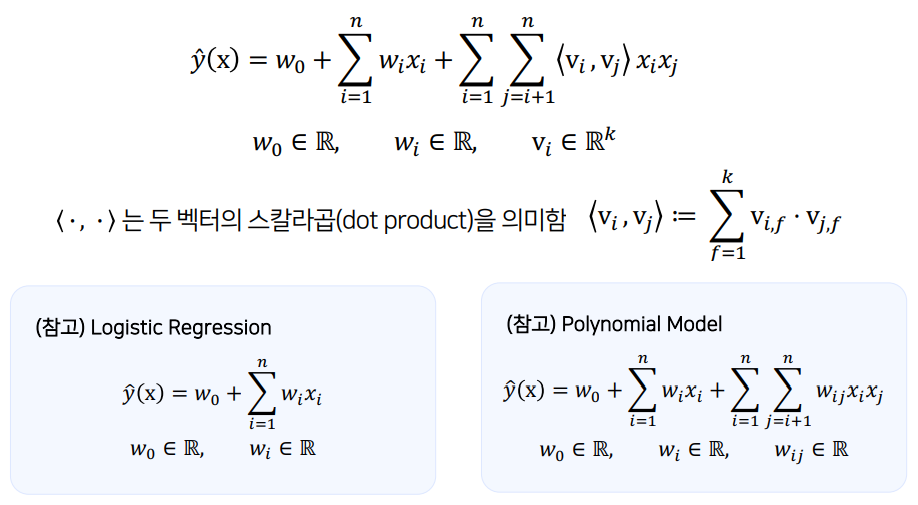

## 2.3 FM의 활용
**Sparse한 데이터셋에서 예측하기(1/2)**

유저의 영화에 대한 평점 데이터는 대표적인 High Sparsity 데이터이다.
- 유저 - 아이템 매트릭스에서 다루던 Sparse Matrix와는 다른 의미이다.
<br></br>

평점 데이터 = {(유저1, 영화2, 5), (유저3, 영화1, 4), (유저2, 영화3, 1), ...}
- 일반적인 CF 문제의 입력 데이터와 같다.
<br></br>

위의 평점 데이터를 일반적인 입력 데이터로 바꾸면, 입력 값의 차원이 전체 유저와 아이템 수만큼 증가한다.
- ex) 유저 수가 U명, 영화의 수가 M개일 때
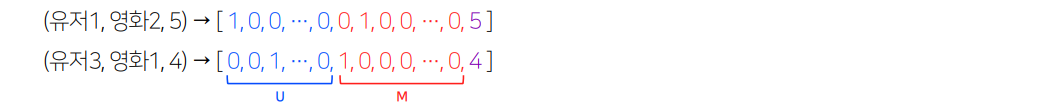

**Sparse한 데이터셋에서 예측하지(2/2)**

유저 A의 ST에 대한 평점 예측? -> $V_A, V_{ST}$가 FM 모델을 통해 학습되기 때문에 상호작용이 반영된다.
- $V_{ST}$ : 유저 B, C의 영화 ST에 대한 평점 데이터를 통해 학습됐다(유저 B, C는 영화 ST 외에 다른 영화도 평가했다).
- $V_A$ : 유저 B, C가 유저 A와 공유하는 영화 SW의 평점 데이터를 통해 학습됐다.
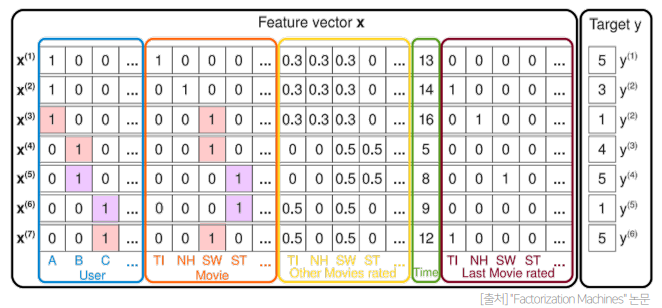

**FM의 장점**
<br></br>
vs. SVM
- 매우 sparse한 데이터에 대해서 높은 예측 성능을 보인다.
- 선형 복잠도($O(kn)$)을 가지므로 수십 억 개의 학습 데이터에 대해서도 빠르게 학습한다.
    - 모델의 학습에 필요한 파라미터의 개수도 선형적으로 비례한다.
<br></br>

vs. Matrix Factorization
- 여러 예측 문제(회귀/분류/랭킹)에 모두 활용 가능한 범용적인 지도 학습 모델이다.
- 일반적인 실수 변수(real-value feature)를 모델의 입력(input)으로 사용한다.
    - MF와 비교했을 때 유저, 아이템 ID 외에 다른 부가 정보들을 모델의 피쳐로 사용할 수 있다.

# 3. Field-aware Factorization Machine(FFM)
## 3.1 개요
**Field-aware Factorization Machines for CTR Prediction**
: FM의 변형된 모델인 FFM을 제안하여 더 높은 성능을 보인 논문이다.
<br></br>

**FFM의 등장 배경**

FM은 예측 문제에 두루 적용 가능한 모델로, 특히 sparse 데이터로 구성된 CTR 예측에서 좋은 성능을 보인다.

FFM은 FM을 발전시킨 모델로서 PITF 모델에서 아이디어를 얻었다.
- PITF : Pairwise Interaction Tensor Factorization
- PTIF에서는 (user, item, tag) 3개의 필드에 대한 클릭률을 예측하기 위해
- (user, item), (item, tag), (user, tag)각각에 대해 서로 다른 latent factor를 정의하여 구했다.

**=> 이를 일반화하여 여러 개의 필드에 대해서 latent factor를 정의한 것이 FFM이다.**

**FFM의 특징**

입력 변수를 필드(field)로 나누어, 필드별로 서로 다른 latent factor를 가지도록 factorize한다.
- 기존의 FM은 하나의 변수에 대해서 k개로 factorize햇으나 FFM은 f개의 필드에 대해 각각 k개로 factorize한다.
<br></br>

Field는 모델을 설계할 때 함께 정의되며, 같은 의미를 갖는 변수들의 집합으로 설정한다.
- 유저 : 성별, 디바이스, 운영체제
- 아이템 : 광고, 카테고리
- 컨텍스트 : 어플리케이션, 배너
<br></br>

CTR 예측에 사용되는 피쳐는 이보다 훨씬 다양한데 피쳐의 개수만큼 필드를 정의하여 사용할 수 있다.

## 3.2 FFM 공식
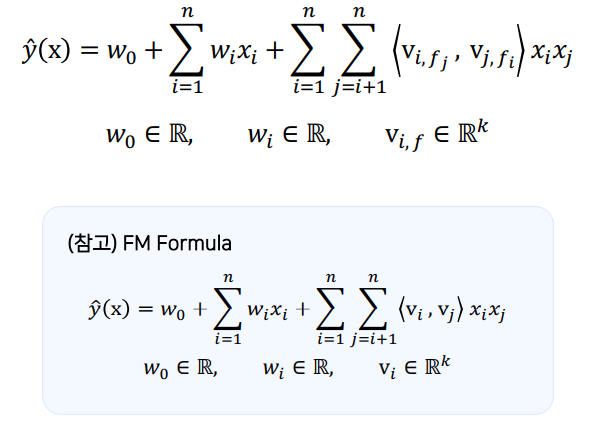

**FM vs. FFM**

광고 클릭 데이터가 존재하고 사용할 수 있는 feature가 총 세 개(Publisher, Advertiser, Gender)일 때,
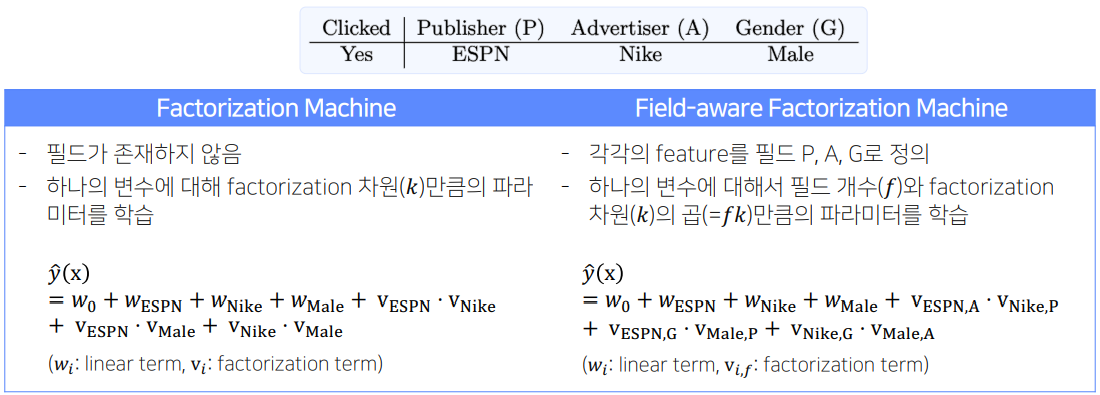

## 3.3 FFM 활용
**FFM의 필드 구성(1/2)**

Categorical Feature
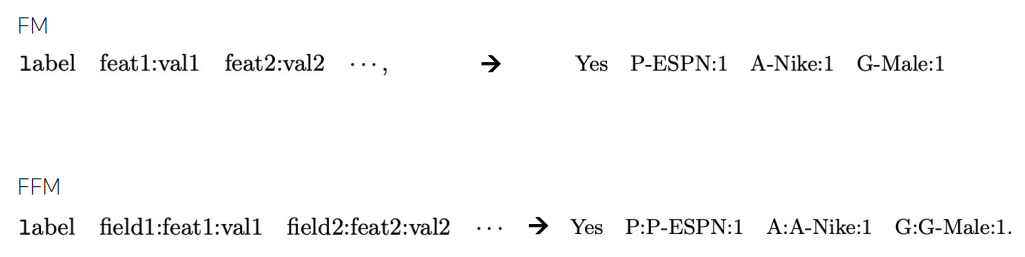

**FFM의 필드 구성(2/2)**

Numerical Feature
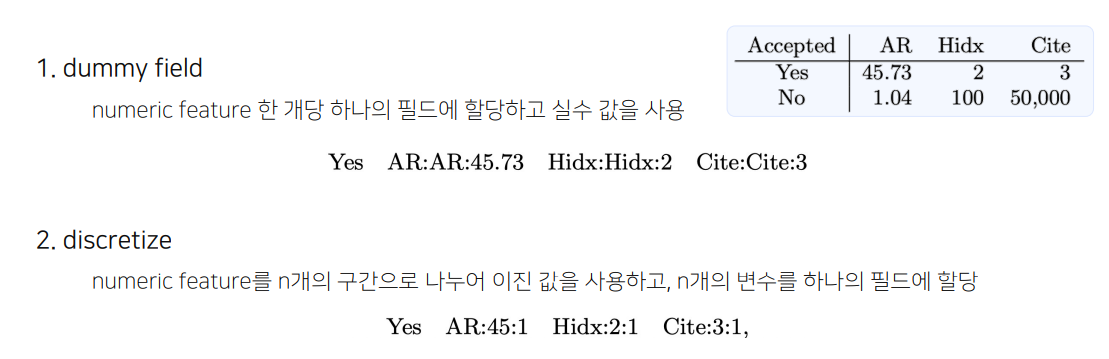

**FM / FFM 성능 비교**

데이터 셋에 따라 조금씩 다르지만 LR에 비해 FM, FFM이 더 좋은 성능을 보인다.
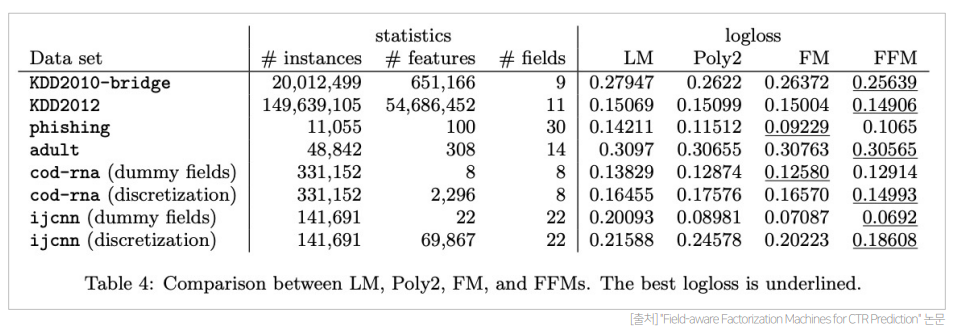

# 4. Gradient Boosting Machine(GBM)
## 4.1 개요
**Gradient Boosting Machine(GBM)을 통한 CTR 예측**

**CTR 예측을 통해 개인화된(personalized)추천 시스템을 만들 수 있는 또 다른 대표적인 모델이다.**
- 8개의 오픈 CTR 데이터셋에 대해 다른 추천 모델(FM 계열 포함)보다 높은 성능을 보인다.
- ex) 하쿠나 라이브 @ 하이퍼커넥트
    - 서비스 데이터가 축적됨에 따라 초기의 인기도 기반 혹은 휴리스틱 기반 추천 시스템에서 탈피
    - 하이퍼파라미터에 비교적 민감하지 않은(robust)모델
    - (FM, FFM, DeepFM 모델) < (기존에 사용하던 휴리스틱 모델) < (GBM 계열 모델)

## 4.2 GBM
**Boosting**

앙상블(ensemble) 기법의 일종이다.
- 앙상블 : 모델의 편향에 따른 예측 오차를 줄이기 위해 여러 모델을 결합하여 사용하는 기법
<br></br>

의사결정 나무(decision tree)로 된 weak learner들을 연속적으로 학습하여 결합하는 방식이다.
- 연속적 : 이전 단계의 weak learner가 취약했던 부분을 위주로 데이터를 샘플링하거나 가중치를 부여해 다음 단계의 leraner를 학습한다는 의미이다.
<br></br>

Boosting 기반 모델
- AdaBoost, Gradient Boosting Machine, XGBoost, LightGBM, CatBoost, etc...

**Gradient Boosting**

gradient descent를 사용하여 loss function이 줄어드는 방향(negative gradient)으로 week learner들을 반복적으로 결합함으로써 성능을 향상시키는 Boosting 알고리즘이다.
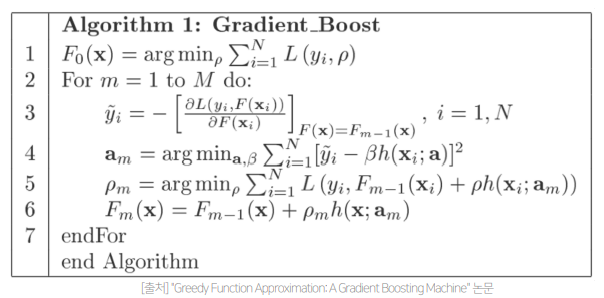

**Gradient Boosting vs. Residual Fitting**

통계학적 관점에서, Gradient Boosting은 잔차(residual)를 적합(fitting)하는 것으로 이해할 수 있다.
- 이전 단계의 weak learner까지의 residual을 계산하여, 이를 예측하는 다음 weak learner를 학습한다.
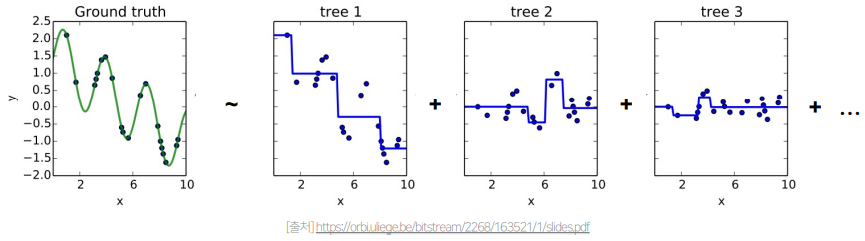

회귀 문제에서는 예측값으로 residual을 그대로 사용하고, 분류 문제에서는 log(odds)값을 사용한다.

------------
**Gradient Boosted Regression Tree 예제**

-----------

**Gradient Boosting 알고리즘의 장단점**

장점
- 대체로 random forest보다 나은 성능을 보인다.
<br></br>

단점
- 1. 느린 학습 속도
- 2. 과적합 문제(prediction shift)

## 4.3 대표적인 모델
**Gradient Boosting의 문제점을 해결하기 위한 대표적인 모델/라이브러리**

XGBoost
- Extreme gradient boosting의 약자로, 병렬처리 및 근사 알고리즘을 통해 학습 속도를 개선한 라이브러리
<br></br>

LightGBM
- Microsoft에서 제안. 병렬 처리 없이도 빠르게 Gradient Boosting을 학습할 수 있도록 하는 라이브러리
<br></br>

CatBoost
- 범주형 변수에 효과적인 알고리즘 등을 구현하여 학습 속도를 개선하고 과적합을 방지하고자 한 라이브러리